# Science Saturday 1

In [1]:
# Global imports
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

In [2]:
# Plotting things
plt.xkcd()
colors = ['maroon','moccasin']

In [3]:
## Reading in data and re-organizing it into something easier to analyze. 
## Throwig out the tests were there was a Rosé wine.
a = pd.read_csv('../data/SS1_redvsWhiteGroupA.csv') 
b = pd.read_csv('../data/SS1_redvsWhiteGroupB.csv') 

c = pd.concat([a,b],ignore_index=True) 
idx = c.wine2_color=='Rose'
c = c[~idx]
c.columns

Index(['case', 'guesser', 'wine1', 'wine1_number', 'wine1_color',
       'wine1_guess', 'wine1_rating', 'wine1_correct', 'wine2', 'wine2_number',
       'wine2_color', 'wine2_guess', 'wine2_rating', 'wine2_correct'],
      dtype='object')

In [4]:
wine1 = c[['case', 'guesser', 'wine1', 'wine1_number', 'wine1_color','wine1_guess', 'wine1_rating', 'wine1_correct']].copy()
wine2 = c[['case', 'guesser', 'wine2', 'wine2_number', 'wine2_color','wine2_guess', 'wine2_rating', 'wine2_correct']].copy()

wine2.columns = wine2.columns.str.replace('wine2','wine1')

tab = pd.concat([wine1,wine2],ignore_index=True)

tab.columns = ['case', 'guesser', 'wine', 'wine_number', 'wine_color','wine_guess', 'wine_rating', 'wine_correct']
tab

,case,guesser,wine,wine_number,wine_color,wine_guess,wine_rating,wine_correct
0,1,Dave,Chardonay,6,White,White,3.0,True
1,1,Heather,Chardonay,6,White,White,2.0,True
2,1,Jon,Chardonay,6,White,Rose,3.0,False
3,1,Katie,Chardonay,6,White,White,5.0,True
4,1,Matt G,Chardonay,6,White,Red,3.0,False
...,...,...,...,...,...,...,...,...
315,11,Jenna,Cabernet Sauvignon (non-fridge),11,Red,Red,3.0,True
316,11,Rachel,Cabernet Sauvignon (non-fridge),11,Red,Red,5.0,True
317,11,Jules,Cabernet Sauvignon (non-fridge),11,Red,Red,5.0,True
318,11,Matt D.,Cabernet Sauvignon (non-fridge),11,Red,Red,3.0,True


### Question 1
The simplest analysis that can be done is to figure out what percentage of wines were guessed correctly, regardless of what color they were paired with. Some of the tests included Rose, but those have been excluded in this portion of the analysys. (The guessers were not told there would be a third type of wine, right?)

In [5]:
q1 = tab.wine_correct.sum()/tab.wine_correct.count()
print(f'Overall, {100*q1:.1f}% of wines were identified correctly.')

Overall, 83.1% of wines were identified correctly.


wine_color
Red      0.859375
White    0.789062
Name: wine_correct, dtype: float64

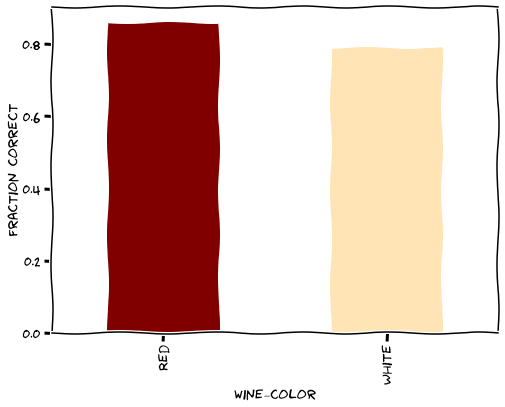

In [6]:
q1a = tab.groupby('wine_color')['wine_correct'].sum()/tab.groupby('wine_color')['wine_correct'].count()
q1a.plot(kind='bar',color=colors,figsize=(8,6))
plt.ylabel('Fraction correct')
plt.savefig('q1a.png',bbox_inches='tight')
q1a

### Question 2
A different question to ask is, give a pair of red and white wines, ignoring what order they were served in, how many times were both wines identified correctly?

In [7]:
q2tab = c[c.wine1_color != c.wine2_color]
q2 = (q2tab.wine1_correct & q2tab.wine2_correct).sum()/len(q2tab)
print(f'When the two wines in a test were different, they were both guessed correctly {100*q2:.1f}% of the time.')

When the two wines in a test were different, they were both guessed correctly 73.2% of the time.


### Question 3
Next we look at the results taking into account the different permutations. The table was broken down This is going to be annoying.

In [8]:
rw = c[(c.wine1_color=='Red')&(c.wine2_color=='White')]
wr = c[(c.wine1_color=='White')&(c.wine2_color=='Red')]
rr = c[(c.wine1_color=='Red')&(c.wine2_color=='Red')]
ww = c[(c.wine1_color=='White')&(c.wine2_color=='White')]

In [17]:
P = pd.DataFrame([[rw.wine1_correct.sum()/len(rw),rw.wine2_correct.sum()/len(rw),len(rw)],
                 [wr.wine1_correct.sum()/len(wr),wr.wine2_correct.sum()/len(wr),len(wr)],
                 [rr.wine1_correct.sum()/len(rr),rr.wine2_correct.sum()/len(rr),len(rr)],
                 [ww.wine1_correct.sum()/len(ww),ww.wine2_correct.sum()/len(ww),len(ww)]],
                 index=['R->W','W->R','R->R','W->W'],
                 columns=['First','Second','N samples']
                )
P[['First','Second']] = P[['First','Second']]*100
print(tabulate(P,tablefmt='rst',headers=P.columns))

====  =======  ========  ===========
..      First    Second    N samples
====  =======  ========  ===========
R->W  82.5      82.5              40
W->R  77.7778   91.6667           72
R->R  75        90                40
W->W  75        75                 8
====  =======  ========  ===========


### Question 4
Now we see which wines were determined correctly, broken down by wine types. 

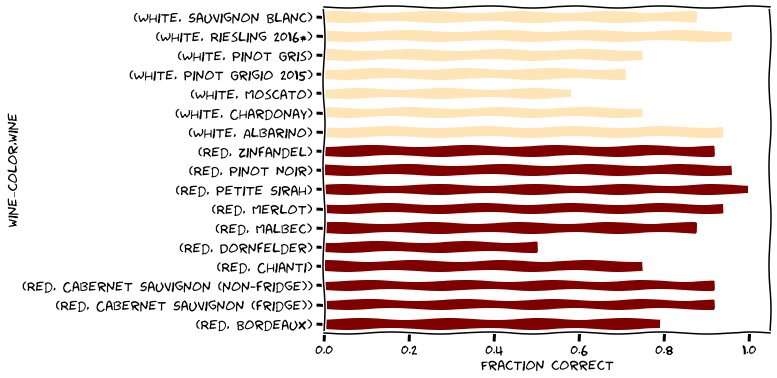

In [10]:
q4tab = tab.groupby(['wine_color','wine'])['wine_correct'].sum()/\
        tab.groupby(['wine_color','wine'])['wine_correct'].count()
colors = ['maroon']*q4tab.loc['Red'].count() + ['moccasin']*q4tab.loc['White'].count()
q4tab.plot(kind='barh',color=colors,figsize=(8,6))
plt.xlabel('Fraction correct')
plt.savefig('q4.png',bbox_inches='tight')

### Question 5
Now let's see how the individual guessers did.

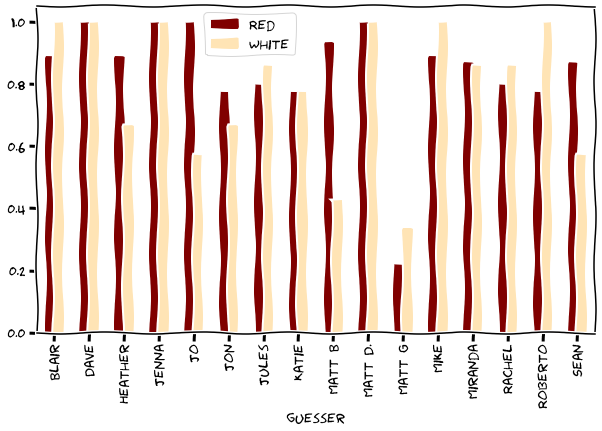

In [11]:
q5tab = tab.groupby(['guesser','wine_color'])['wine_correct'].sum().unstack()/\
        tab.groupby(['guesser','wine_color'])['wine_correct'].count().unstack()
q5tab.plot(kind='bar',color=['maroon','moccasin'],figsize=(10,6))
plt.legend(loc=(0.3,0.85))
plt.savefig('q5.png',bbox_inches='tight')